#### kearkliy kutubxonalarimizni chaqirib olamiz va kod yozishni boshlaymiz

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Datasetimizni uqib kuramiz

In [3]:
df = pd.read_csv('imdb_top_1000.csv')

In [5]:
df.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


#### datasetimizdagi Runtime ustunini int sifatida yangi ustunga saqlaymiz

In [8]:
df['Runtime_minute'] = df['Runtime'].str.extract('(\d+)')
df.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_minute
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",142
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",175


#### Olingan reyting buyicha sortlaymiz

In [16]:
df.sort_values(by='IMDB_Rating', ascending=False, inplace=True)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Runtime_minute
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",142
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",175
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",152
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",202
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",96


##### ballar buyicha gurhlaymiz va shu ballarda davomiyligning eng kami va eng kupini aniqlaymiz

In [69]:
df['int_rating'] = df['IMDB_Rating'].astype('int32')
df.groupby('int_rating')['Runtime_minute'].agg(['min', 'max']).reset_index()

,int_rating,min,max
0,7,100,99
1,8,100,99
2,9,142,96


##### Aktyorlarning uynagin kinolarining reytingi buyicha ballarini aniqlaymiz

In [84]:
df.groupby(['Star1', 'Star2', 'Star3'])['IMDB_Rating'].agg(['mean', 'max', 'min']).reset_index().sort_values(by='mean', ascending=False)

,Star1,Star2,Star3,mean,max,min
895,Tim Robbins,Morgan Freeman,Bob Gunton,9.3,9.3,9.3
635,Marlon Brando,Al Pacino,James Caan,9.2,9.2,9.2
190,Christian Bale,Heath Ledger,Aaron Eckhart,9.0,9.0,9.0
386,Henry Fonda,Lee J. Cobb,Martin Balsam,9.0,9.0,9.0
26,Al Pacino,Robert De Niro,Robert Duvall,9.0,9.0,9.0
...,...,...,...,...,...,...
255,Denzel Washington,Clive Owen,Jodie Foster,7.6,7.6,7.6
628,Marion Cotillard,Sylvie Testud,Pascal Greggory,7.6,7.6,7.6
101,Bill Pullman,Patricia Arquette,John Roselius,7.6,7.6,7.6
625,Maribel Verdú,Gael García Bernal,Daniel Giménez Cacho,7.6,7.6,7.6


#### aktyorlarni holatlar buyicha kursatgichini tekshirib kuramiz

In [106]:
ac = df.loc[df.groupby(['Star1', 'Star2', 'Star3'])['IMDB_Rating'].idxmax()].reset_index()
ac[['Series_Title', 'Star1', 'Star2', 'Star3', 'Genre', 'Released_Year', 'IMDB_Rating']].sort_values('IMDB_Rating', ascending=False)

,Series_Title,Star1,Star2,Star3,Genre,Released_Year,IMDB_Rating
895,The Shawshank Redemption,Tim Robbins,Morgan Freeman,Bob Gunton,Drama,1994,9.3
635,The Godfather,Marlon Brando,Al Pacino,James Caan,"Crime, Drama",1972,9.2
190,The Dark Knight,Christian Bale,Heath Ledger,Aaron Eckhart,"Action, Crime, Drama",2008,9.0
26,The Godfather: Part II,Al Pacino,Robert De Niro,Robert Duvall,"Crime, Drama",1974,9.0
386,12 Angry Men,Henry Fonda,Lee J. Cobb,Martin Balsam,"Crime, Drama",1957,9.0
...,...,...,...,...,...,...,...
628,La Vie En Rose,Marion Cotillard,Sylvie Testud,Pascal Greggory,"Biography, Drama, Music",2007,7.6
101,Lost Highway,Bill Pullman,Patricia Arquette,John Roselius,"Mystery, Thriller",1997,7.6
258,The Hurricane,Denzel Washington,Vicellous Shannon,Deborah Kara Unger,"Biography, Drama, Sport",1999,7.6
625,Y tu mamá también,Maribel Verdú,Gael García Bernal,Daniel Giménez Cacho,Drama,2001,7.6


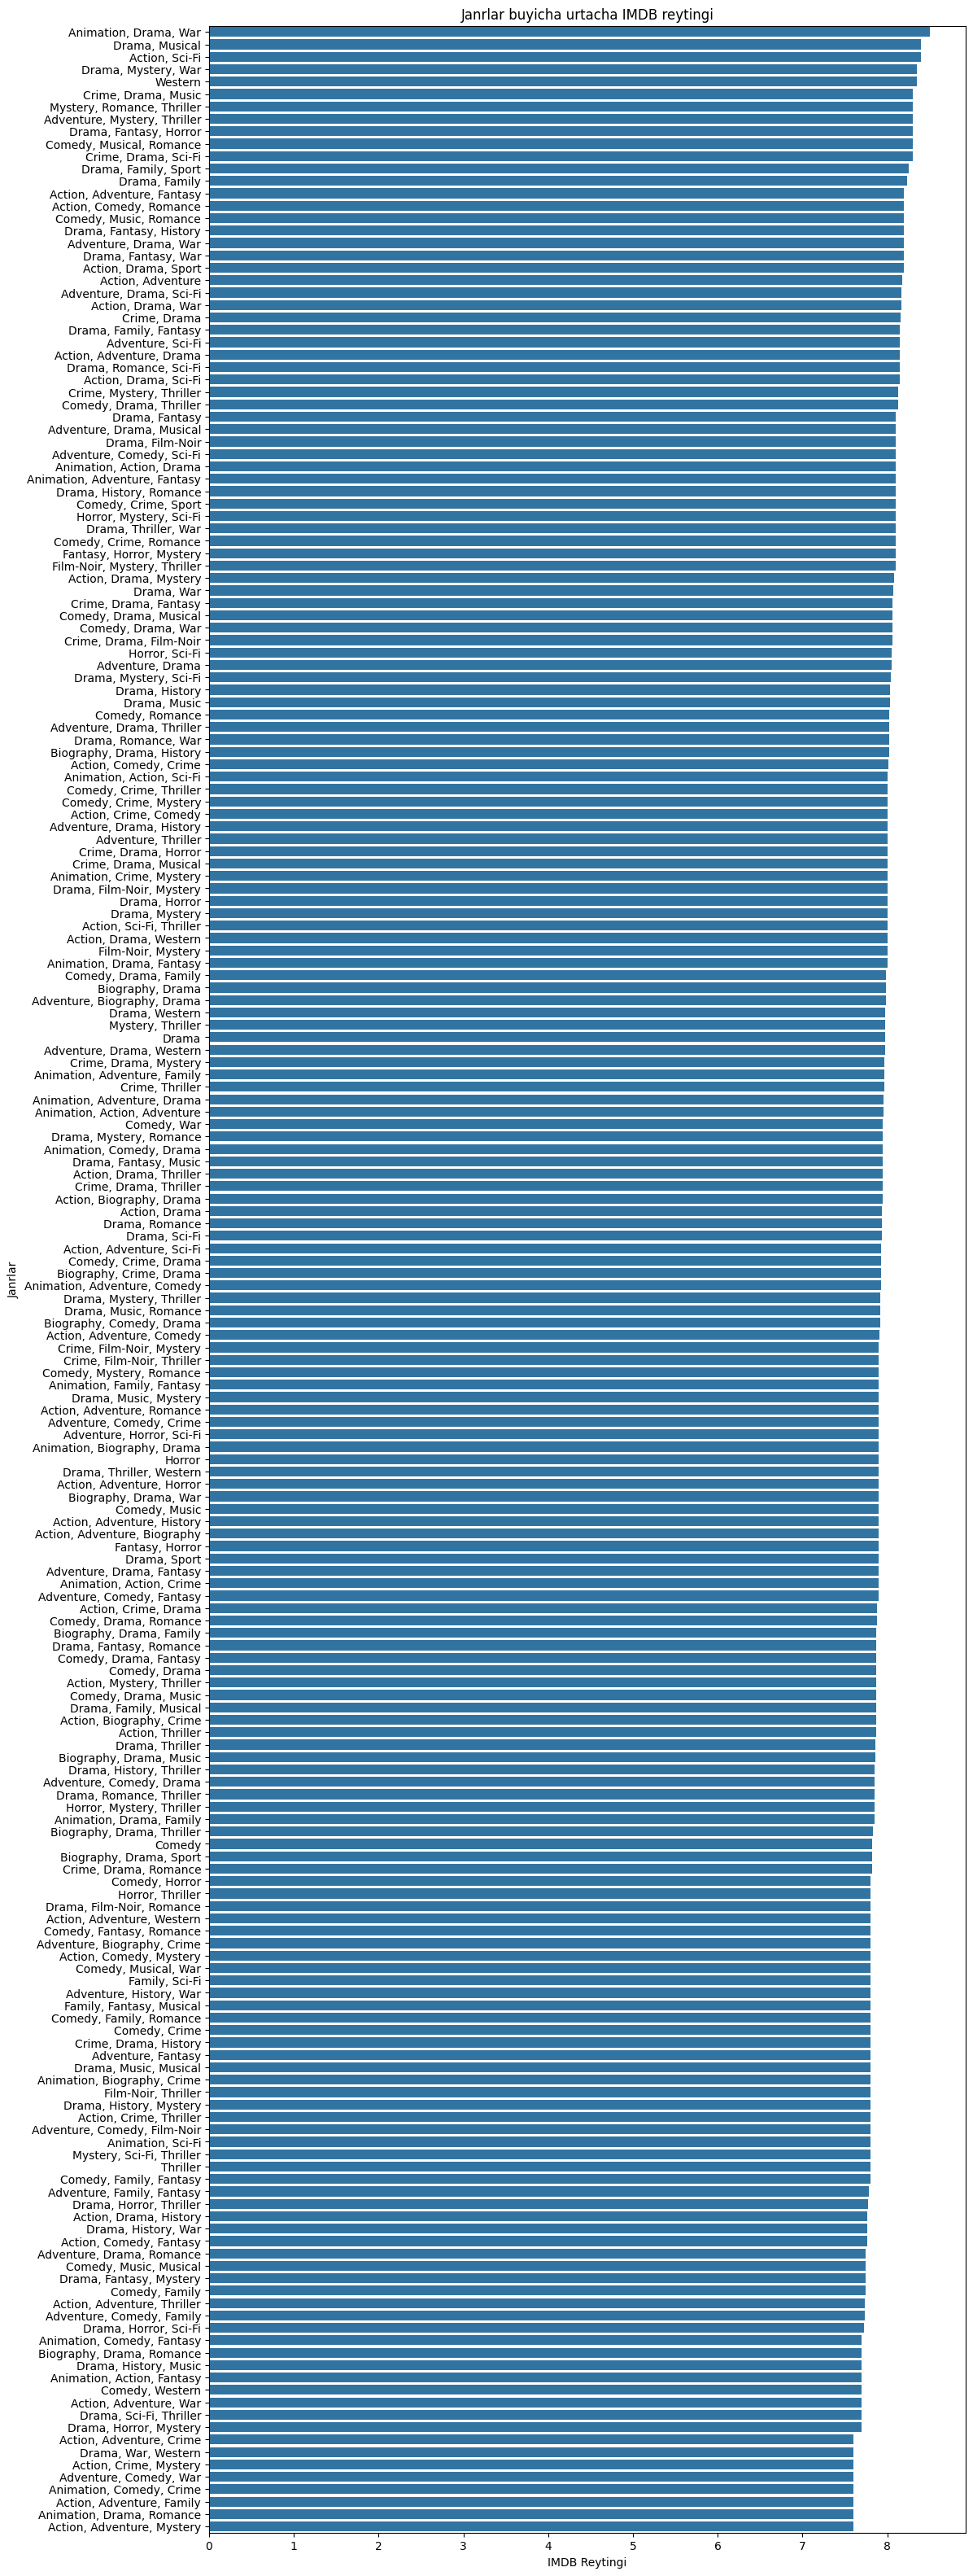

In [131]:
genre_rating = df.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 40))
sns.barplot(x=genre_rating, y=genre_rating.index,saturation=0.99, ax=ax)
plt.xlabel('IMDB Reytingi')
plt.ylabel('Janrlar')
plt.title("Janrlar buyicha urtacha IMDB reytingi")
plt.show()